# Topic Analysis over Time 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("../ai_medreview/data/data.csv")
data.head()

,time,rating,free_text,do_better,surgery,pcn,sentiment_free_text,sentiment_score_free_text,sentiment_do_better,sentiment_score_do_better,free_text_len,do_better_len,rating_score,feedback_labels,improvement_labels,submission_id,respondent-id,emotion_free_text,emotion_do_better
0,2023-11-01 09:13:00,Good,I am happy with telephone appointments,NaN,Scarsdale-Medical-Centre,Brompton-Health-PCN,positive,0.888171,neutral,0.0,6.0,0,4.0,Appointment Availability,NaN,mannual,upload,joy,NaN
1,2023-11-01 09:52:00,Poor,Not having to wait in the waiting room for 50m...,NaN,Scarsdale-Medical-Centre,Brompton-Health-PCN,neutral,0.512796,neutral,0.0,17.0,0,2.0,Appointment Availability,NaN,mannual,upload,neutral,NaN
2,2023-11-01 10:22:00,Good,NaN,NaN,Scarsdale-Medical-Centre,Brompton-Health-PCN,neutral,0.000000,neutral,0.0,2.0,0,4.0,NaN,NaN,mannual,upload,NaN,NaN
3,2023-11-01 10:58:00,Good,NaN,NaN,Scarsdale-Medical-Centre,Brompton-Health-PCN,neutral,0.000000,neutral,0.0,1.0,0,4.0,NaN,NaN,mannual,upload,NaN,NaN
4,2023-11-01 11:03:00,Very good,NaN,NaN,Earls-Court-Surgery,Brompton-Health-PCN,neutral,0.000000,neutral,0.0,0.0,0,5.0,NaN,NaN,NaN,NaN,NaN,NaN


2024-08-04 17:38:55.232 
  command:

    streamlit run /Users/janduplessis/.pyenv/versions/3.12.1/envs/lewagon/lib/python3.12/site-packages/ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

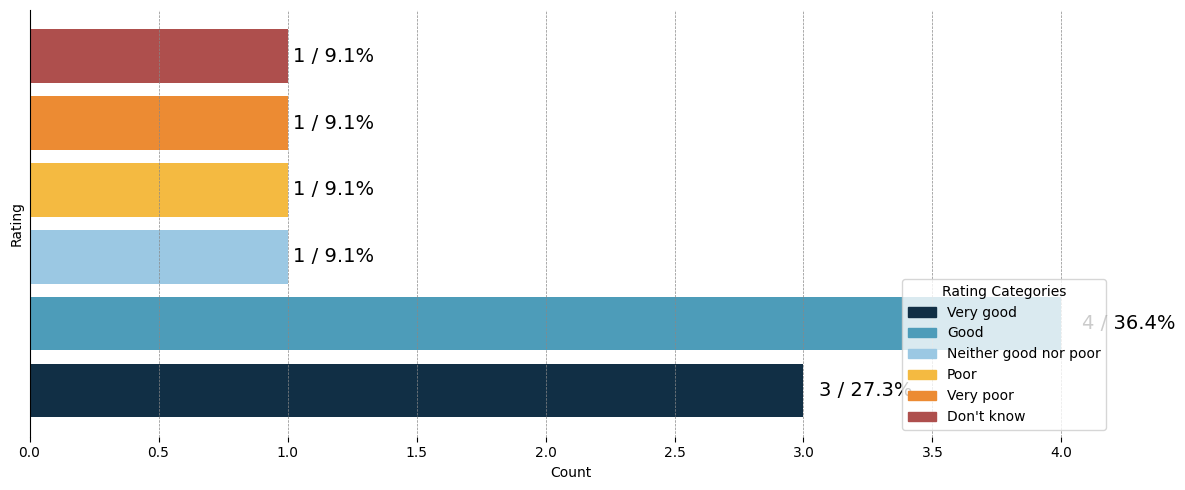

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import streamlit as st
from matplotlib.patches import Patch

# Sample filtered_data DataFrame for demonstration purposes
# Replace this with your actual data
data = {
    "rating": [
        "Very good",
        "Good",
        "Good",
        "Poor",
        "Very poor",
        "Don't know",
        "Very good",
        "Good",
        "Neither good nor poor",
        "Very good",
        "Good",
    ]
}
filtered_data = pd.DataFrame(data)

order = [
    "Very good",
    "Good",
    "Neither good nor poor",
    "Poor",
    "Very poor",
    "Don't know",
]

palette = {
    "Very good": "#112f45",
    "Good": "#4d9cb9",
    "Neither good nor poor": "#9bc8e3",
    "Poor": "#f4ba41",
    "Very poor": "#ec8b33",
    "Don't know": "#ae4f4d",
}

# Get value counts in the specified order
value_counts = filtered_data["rating"].value_counts().reindex(order).fillna(0)

# Set the figure size (width, height) in inches
plt.figure(figsize=(12, 5))

# Create the bar plot
bars = plt.barh(
    value_counts.index,
    value_counts.values,
    color=[palette[key] for key in value_counts.index],
)

# Remove y-axis labels
plt.yticks([])

# Create a custom legend
legend_patches = [Patch(color=color, label=label) for label, color in palette.items()]
plt.legend(
    handles=legend_patches,
    title="Rating Categories",
    bbox_to_anchor=(1, 0),  # Place legend at the bottom right
    loc="lower right",
)

# Iterate through the bars of the plot for width annotations
total = filtered_data.shape[0]
for bar in bars:
    width = bar.get_width()
    offset = width * 0.02
    y = bar.get_y() + bar.get_height() / 2
    plt.text(
        width + offset,
        y,
        f"{int(width)} / {round((int(width) / total) * 100, 1)}%",
        va="center",
        fontsize=14,
    )

# Adjust plot appearance
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.xaxis.grid(True, linestyle="--", linewidth=0.5, color="#888888")
ax.yaxis.grid(False)
plt.xlabel("Count")
plt.ylabel("Rating")
plt.tight_layout()

st.pyplot(plt)

In [5]:
sns.countplot(data=data, x="rating")

<Axes: xlabel='rating', ylabel='count'>